In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

# Generador de muestras
## Creando Burbujas

In [2]:
from sklearn.datasets.samples_generator import make_blobs

C:\Users\Jorge\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
#n_samples:número de instancias
#centers: número de centros
#cluster_std: desviación standar de cada cluster

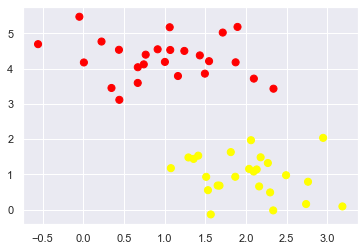

In [4]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")

In [5]:
from sklearn.svm import SVC

In [6]:
model=SVC(kernel="linear", C = 1E10) #C = 1E10
model.fit(X,Y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [8]:
#PLOT SUPPORT (PINTAR EL SOPORTE)
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    #COMBINANDO LOS PUNTOS
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "Black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


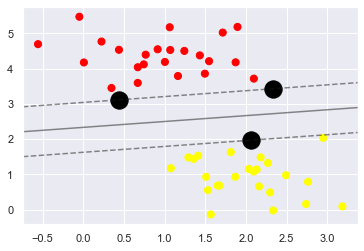

In [9]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
#pintar los soportes vectoriales
plt_svc(model, plot_support=True)

In [10]:
from sklearn.datasets.samples_generator import make_circles, make_blobs
X, Y = make_circles(100, factor = .1, noise = .1) 

In [11]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

[[-0.67662355  0.58350856]
 [ 0.57068328 -0.59700693]
 [ 0.43715284  0.74901371]
 [ 0.00447387 -0.90550584]
 [-0.53294346 -0.60512105]
 [-0.10427917  0.80571246]
 [-0.8507468  -0.03223206]
 [ 0.98307044  0.18882207]
 [ 0.65338952  0.66398972]
 [-0.19607749  0.29759605]
 [ 0.05784392 -0.26752754]]


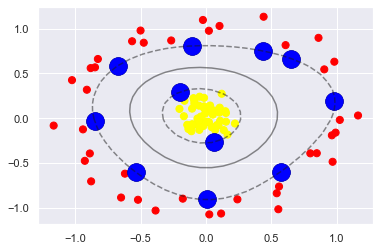

In [12]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

# SVM para Clasificación

In [13]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import pandas as pd
import os
mainpath = "C:/Users/Jorge/PDE_DSML_Notebooks/data/"
filename = "iris.csv"
fullpath = os.path.join(mainpath, filename)

In [15]:
#CARGAR TUS BASES
iris = pd.read_csv(fullpath)
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [16]:
iris['Species'] = pd.factorize(iris["Species"])[0]
X = iris.iloc[0:,0:2].to_numpy()
Y = iris.Species.to_numpy()

In [17]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

C=1 es ESTANDAR, MAS GRANDE ES MAS RESTRICTIVO, MAS BAJO ES MAS LAXO.El parámetro C es el peso que le
damos a cada observación a la hora de clasificar, un mayor coste implicaría un mayor peso de una observación
y el SVM sería más estricto. Se podrá ver como la predicción es más conservadora cuando ponemos costes más bajos.

In [18]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C).fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

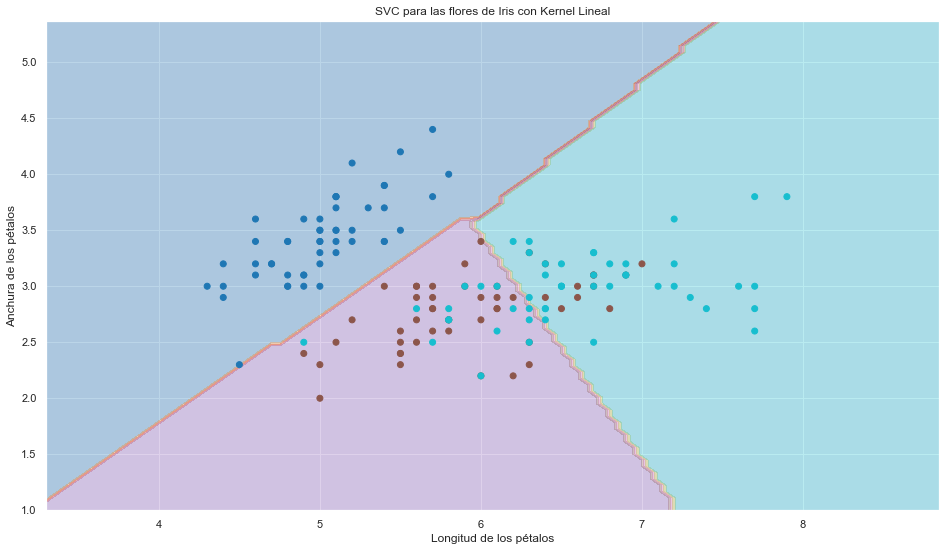

In [19]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1],c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

In [20]:
C = 1.0
svc = svm.SVC(kernel="rbf", C=C).fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Radial')

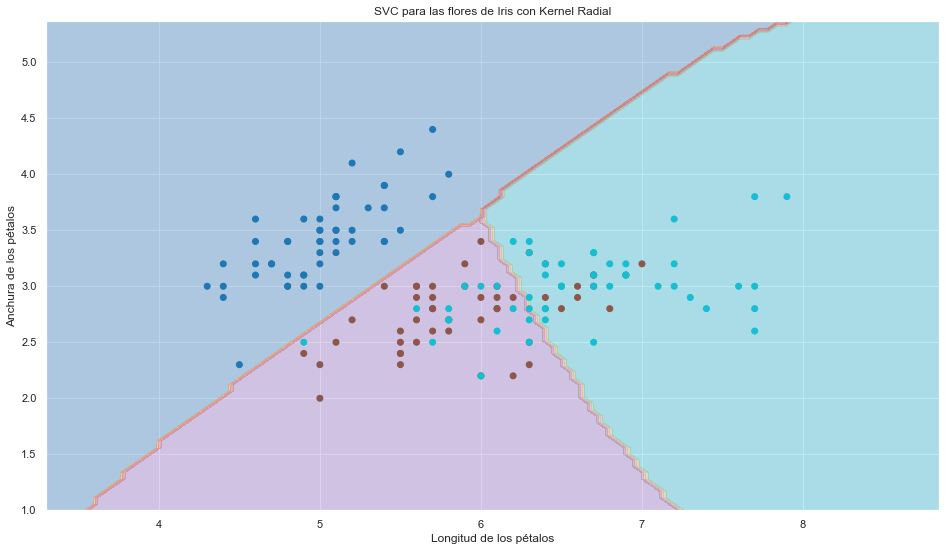

In [21]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoide')

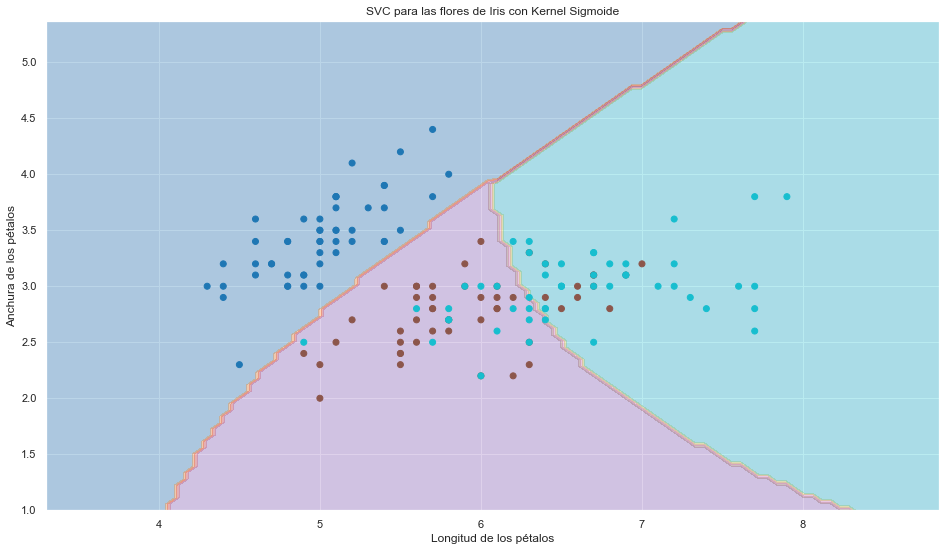

In [22]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Sigmoide")

In [23]:
X2 = iris.iloc[0:,0:4].to_numpy()
Y2 = iris.Species.to_numpy()
Y2.shape

(150,)

In [24]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X2,Y2)
Ypred = svc.predict(X2)

In [25]:
dat1=pd.DataFrame(data=Ypred, columns = ['Ypred'])
dat1.head()
dat2=pd.DataFrame(data=Y2, columns = ['Yreal'])
final=pd.concat([dat1, dat2], axis=1)
final

,Ypred,Yreal
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


In [26]:
confusion_matrix = pd.crosstab(final.Yreal,final.Ypred)
confusion_matrix

Ypred,0,1,2
Yreal,,,
0,50,0,0
1,0,49,1
2,0,0,50


In [27]:
svc.score(X2,Y2) # 100%

0.9933333333333333

# SVM para Regresión

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
X = np.sort(5*np.random.rand(200,1),axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5 - np.random.rand(40))

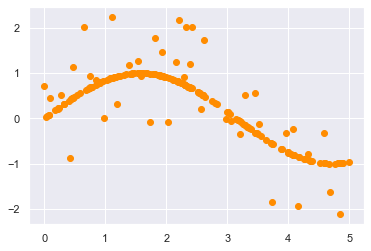

In [30]:
plt.scatter(X,Y, color="darkorange", label="data")

In [31]:
from sklearn.svm import SVR

In [32]:
C=1e3
svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3)

In [33]:
y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

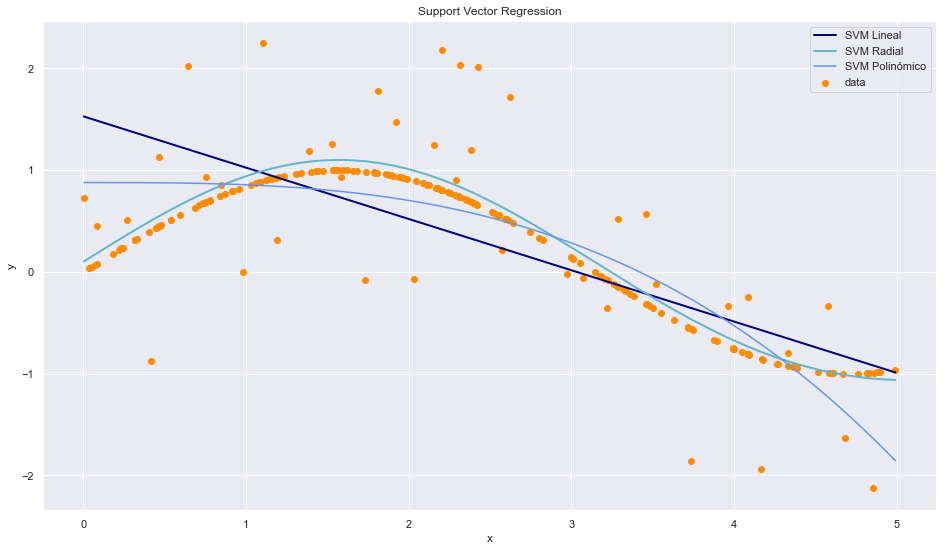

In [34]:
lw = 2
plt.figure(figsize=(16,9))
plt.scatter(X,Y,color="darkorange", label ="data")
plt.plot(X,y_lin, color="navy", lw = lw, label = "SVM Lineal")
plt.plot(X,y_rbf, color="c", lw=lw, label="SVM Radial")
plt.plot(X,y_pol, color="cornflowerblue", label="SVM Polinómico")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

In [35]:
def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    
    
    X = iris.data[:, :2]
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

In [36]:
from ipywidgets import interact, fixed

In [37]:
interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>